In [ ]:
# ! unzip "drive/MyDrive/DL_final/archive.zip" -d  "drive/MyDrive/DL_final/"

In [ ]:
## mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive




# Data Prepare

In [ ]:
## preprocess data
## create custom data class

import os
import torch
import pandas as pd
from skimage import io, transform
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import cv2
from PIL import Image
from  torchvision import utils as vutils
import glob

In [ ]:
class MaskDataset(Dataset):
    """Covid CT TEST dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_list = []
        for i in range(200):
          s = str(i)
          if len(s)==1:
            s = "000"+s
          elif len(s)==2:
            s = "00"+s
          else:
            s = "0"+s 
          filename = self.root_dir+s+".png"       
          self.image_list.append(filename)

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.image_list[idx]
        image = io.imread(img_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
        image = torchvision.transforms.functional.to_tensor(image)
        sample = {'image': image, 'img_name':img_name}
        if self.transform:
            sample['image'] = self.transform(sample['image'])
        return sample

In [ ]:
maskDataset_train_val = MaskDataset(
                                    root_dir='drive/MyDrive/DL_final/with_mask/with-mask-default-mask-seed'
                                    )
nomaskDataset_train_val = MaskDataset(
                                    root_dir='drive/MyDrive/DL_final/without_mask/seed'
                                    )

0 torch.Size([3, 1024, 1024])
1 torch.Size([3, 1024, 1024])
2 torch.Size([3, 1024, 1024])
3 torch.Size([3, 1024, 1024])


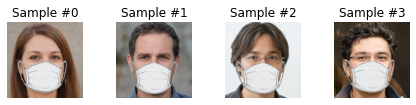

In [ ]:
for i in range(len(maskDataset_train_val)):
    sample = maskDataset_train_val[i]
    print(i, sample['image'].shape)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'].numpy().transpose(1,2,0))
    if i == 3:
        plt.show()
        break

In [ ]:
for i in range(len(maskDataset_train_val)):
  image_copy = maskDataset_train_val[i]['image'].clone()
  x = maskDataset_train_val[i]['image']-nomaskDataset_train_val[i]['image']
  for j in range(3):
    channel = x[j]
    for k in range(len(x[j])):
      row = channel[k]
      for m in range(len(row)):
        if row[m] != 0:
          x[j][k][m] = 1
          image_copy[j][k][m] = 1
  mask_name = 'drive/MyDrive/DL_final/mask'+str(i)+'.png'
  vutils.save_image(x, mask_name)
  fig_name = 'drive/MyDrive/DL_final/fig'+str(i)+'.png'
  vutils.save_image(image_copy, fig_name)


In [ ]:
# train_images = []
# for i in range(len(maskDataset_train_val)):
#   image_copy = maskDataset_train_val[i]['image']
#   train_images.append(image_copy)

'drive/MyDrive/DL_final/fig0.png'

# Base line created

In [ ]:
!python "/content/facenet_distance/get_embedding_distance.py"